In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
df_data = pd.read_excel("Datos_totales.xlsx")
df_data

,Cultivo,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,anio,Precipitacion,Unnamed: 0
0,101,210,35,35,56,1600,2021,257.7,NaN
1,101,462,50,50,70,1400,1988,199.6,NaN
2,101,462,50,50,40,800,1989,180.5,NaN
3,101,469,150,130,190,1462,1988,199.6,NaN
4,101,469,120,120,168,1400,1989,180.5,NaN
...,...,...,...,...,...,...,...,...,...
3379,129,833,105070,105070,514843,4900,2017,419.1,1976.0
3380,129,833,89875,80875,339453,4197,2018,440.8,1977.0
3381,129,833,119000,119000,393100,3303,2019,395.4,1978.0
3382,129,833,131000,131000,570000,4351,2020,503.3,1979.0


In [3]:
#borramos la columna Unnamed
del(df_data['Unnamed: 0'])

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3384 entries, 0 to 3383
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cultivo         3384 non-null   int64  
 1   idDepartamento  3384 non-null   int64  
 2   Sup_Sembrada    3384 non-null   int64  
 3   Sup_Cosechada   3384 non-null   int64  
 4   Producción      3384 non-null   int64  
 5   Rendimiento     3384 non-null   int64  
 6   anio            3384 non-null   int64  
 7   Precipitacion   3384 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 211.6 KB


In [5]:
#vemos un poco los datos y como se distribuyen
df_data.describe()


,Cultivo,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,anio,Precipitacion
count,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.000000,3384.00000,3384.000000
mean,115.909574,417.029551,23898.095154,22276.288121,68289.342199,2971.283688,2005.80792,512.867524
std,10.153570,262.042090,35967.720110,35537.353342,111853.381132,1936.930244,9.55206,244.432019
min,101.000000,14.000000,15.000000,0.000000,0.000000,0.000000,1988.00000,116.000000
25%,105.000000,196.000000,1900.000000,1000.000000,2420.000000,1704.000000,1998.00000,335.500000
50%,116.000000,448.000000,10000.000000,6860.000000,16830.000000,2500.000000,2006.00000,450.500000
75%,125.000000,686.000000,31000.000000,29100.000000,87155.750000,3800.000000,2014.00000,643.200000
max,129.000000,833.000000,265000.000000,265000.000000,884440.000000,13886.000000,2021.00000,1447.500000


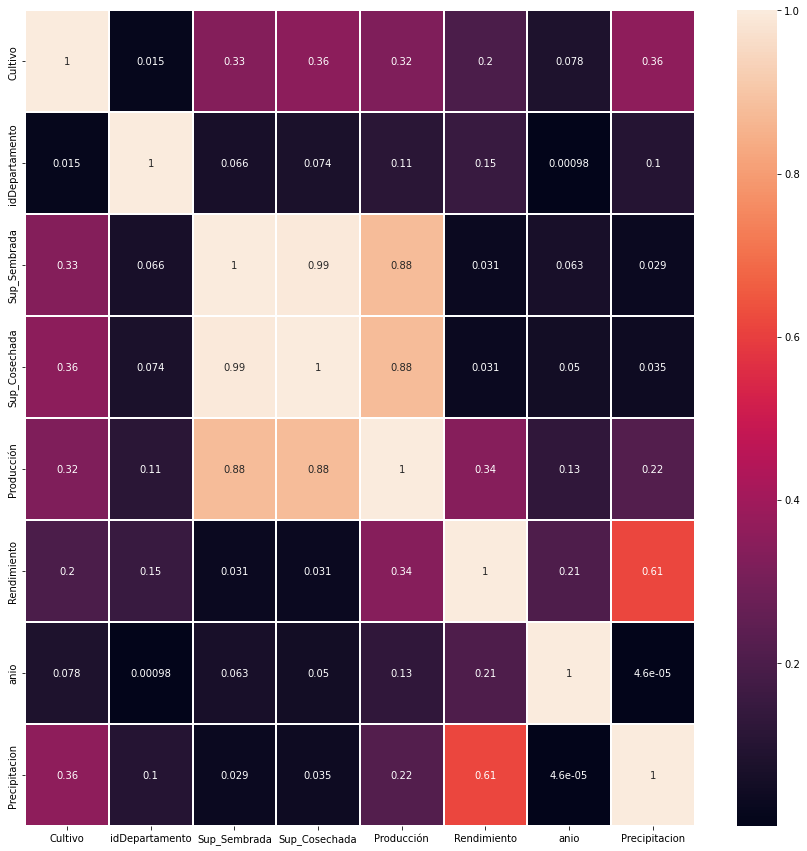

In [6]:
#hacemos un heat map para ver si hay correlaciones entre algunas de las columnas
plt.figure(figsize=(15,15))
cor=df_data.corr()
sns.heatmap(cor, annot=True, linewidths=2)
plt.show()

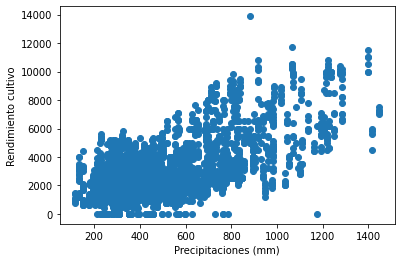

In [7]:
# Como nuestra busqueda se centra en intentar ver la relacion entre las precipitaciones y el rendimiento 
# vemos su relacion en grafico
plt.scatter(df_data["Precipitacion"], df_data["Rendimiento"])
plt.xlabel("Precipitaciones (mm)")
plt.ylabel("Rendimiento cultivo")
plt.show()

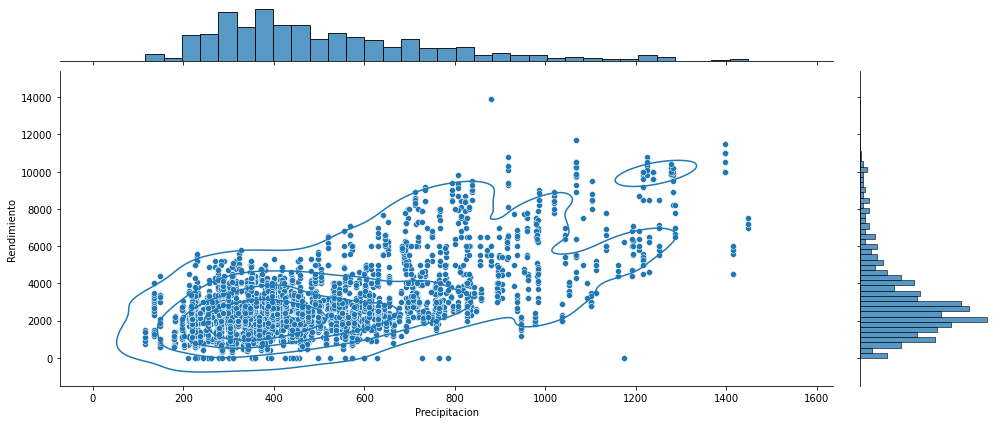

In [8]:
#hacemos un joinplot para ver mejor como se distribuyen las variables rendimiento y precipitaciones
jointplot=sns.jointplot(data=df_data, x="Precipitacion", y ="Rendimiento")
jointplot.plot_joint(sns.kdeplot, levels=5)
jointplot.fig.set_figwidth(15)

In [9]:
X = df_data.drop(columns=["Rendimiento"]).copy(deep=True)
X

,Cultivo,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,anio,Precipitacion
0,101,210,35,35,56,2021,257.7
1,101,462,50,50,70,1988,199.6
2,101,462,50,50,40,1989,180.5
3,101,469,150,130,190,1988,199.6
4,101,469,120,120,168,1989,180.5
...,...,...,...,...,...,...,...
3379,129,833,105070,105070,514843,2017,419.1
3380,129,833,89875,80875,339453,2018,440.8
3381,129,833,119000,119000,393100,2019,395.4
3382,129,833,131000,131000,570000,2020,503.3


In [10]:
y= df_data["Rendimiento"].copy(deep=True)
y

0       1600
1       1400
2        800
3       1462
4       1400
        ... 
3379    4900
3380    4197
3381    3303
3382    4351
3383    4107
Name: Rendimiento, Length: 3384, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.33, random_state=42)

In [13]:
X_test.shape

(1117, 7)

In [14]:
#importamos algoritmos
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X_test)
y_pred

array([2547.55686431, 3641.61897295, 3181.02886854, ..., 2810.09817419,
       8189.12955007, 3799.98412715])

In [16]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
402,4200,2547.556864
321,2900,3641.618973
457,2100,3181.028869
879,3600,4084.735934
2044,3100,2210.320830
...,...,...
1133,6800,4736.356316
261,4600,2605.838831
2847,1100,2810.098174
834,9300,8189.129550


In [17]:
#RMSE
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))

Mean squared error: 1249.65


In [18]:
#MSE
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=True))

Mean squared error: 1561617.18


In [19]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.59


In [20]:
#MAE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 939.0640100309504


In [21]:
df_data.head()

,Cultivo,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,anio,Precipitacion
0,101,210,35,35,56,1600,2021,257.7
1,101,462,50,50,70,1400,1988,199.6
2,101,462,50,50,40,800,1989,180.5
3,101,469,150,130,190,1462,1988,199.6
4,101,469,120,120,168,1400,1989,180.5


In [22]:
#Vamos a probar distintos Datasets, eliminando columnas a ver como se comporta con el algoritmo.
df1=df_data.drop(['Sup_Sembrada', 'Sup_Cosechada','idDepartamento'], axis=1)
df1

,Cultivo,Producción,Rendimiento,anio,Precipitacion
0,101,56,1600,2021,257.7
1,101,70,1400,1988,199.6
2,101,40,800,1989,180.5
3,101,190,1462,1988,199.6
4,101,168,1400,1989,180.5
...,...,...,...,...,...
3379,129,514843,4900,2017,419.1
3380,129,339453,4197,2018,440.8
3381,129,393100,3303,2019,395.4
3382,129,570000,4351,2020,503.3


In [23]:
X = df1.drop(columns=["Rendimiento"]).copy(deep=True)
X

,Cultivo,Producción,anio,Precipitacion
0,101,56,2021,257.7
1,101,70,1988,199.6
2,101,40,1989,180.5
3,101,190,1988,199.6
4,101,168,1989,180.5
...,...,...,...,...
3379,129,514843,2017,419.1
3380,129,339453,2018,440.8
3381,129,393100,2019,395.4
3382,129,570000,2020,503.3


In [24]:
y= df1["Rendimiento"].copy(deep=True)
y

0       1600
1       1400
2        800
3       1462
4       1400
        ... 
3379    4900
3380    4197
3381    3303
3382    4351
3383    4107
Name: Rendimiento, Length: 3384, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.33, random_state=42)

In [26]:
#importamos algoritmos
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = regressor.predict(X_test)
y_pred

array([2292.41323338, 4121.00202777, 3522.93767693, ..., 2487.25804313,
       6839.79237756, 3498.38026415])

In [28]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
402,4200,2292.413233
321,2900,4121.002028
457,2100,3522.937677
879,3600,3876.754864
2044,3100,1851.953660
...,...,...
1133,6800,5103.584296
261,4600,2308.540752
2847,1100,2487.258043
834,9300,6839.792378


In [29]:
#RMSE
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))

Mean squared error: 1443.16


In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
#train_test_split(X,y, test_size=0.33, random_state=42)
model=DecisionTreeRegressor(max_depth = 7)

In [32]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [33]:
y_pred=model.predict(X_test)
y_pred

array([3282.97142857, 2780.        , 2086.85714286, ..., 1494.90163934,
       9924.07407407, 3350.        ])

In [34]:
model.score(X,y)



0.8223567122784332

In [35]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

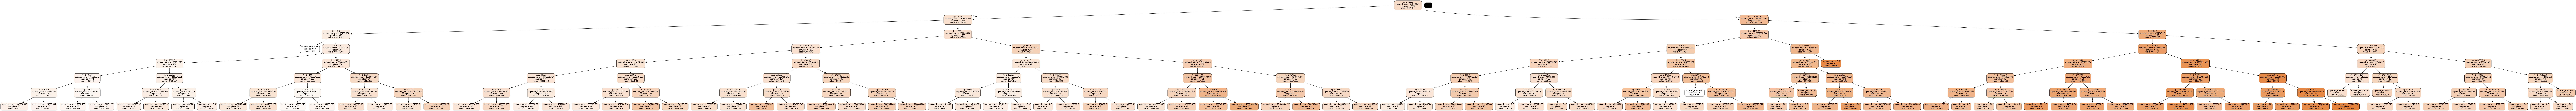

In [36]:
dot_data = StringIO()
export_graphviz(model, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_jpg())

In [37]:
#RMSE
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))

Mean squared error: 919.51


In [38]:
#MAE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 641.012774771746


In [39]:
skew=df_data.skew().abs().sort_values()
skew

Cultivo           0.068802
idDepartamento    0.072094
anio              0.153797
Precipitacion     1.123397
Rendimiento       1.491557
Producción        2.699950
Sup_Sembrada      2.839910
Sup_Cosechada     2.877418
dtype: float64